**1. Importamos base datos**


In [55]:
import pandas as pd

dataframe_datos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data_Combustibles_2014_2024_COLAB.csv")

dataframe_datos




,Fecha,Brent_USD_barril,TRM_COP_USD,Brent_en_COP,Precio_diesel_COP_galon,ICTC_pct
0,2014-01-01,106.40,2015.04,214400,8359,1.48
1,2014-02-01,109.07,2042.50,222775,8359,1.48
2,2014-03-01,107.76,1971.37,212435,8359,1.48
3,2014-04-01,108.07,1935.00,209115,8433,1.48
4,2014-05-01,108.68,1896.00,206057,8426,1.48
...,...,...,...,...,...,...
127,2024-08-01,76.93,4186.50,322067,9756,0.84
128,2024-09-01,71.77,4205.97,301862,10156,2.11
129,2024-10-01,72.81,4425.07,322189,10156,-0.21
130,2024-11-01,71.84,4432.50,318431,9756,0.19


**2. Promedio anual Diesel.**

In [56]:
# Asegurar que la columna Fecha es datetime
dataframe_datos["Fecha"] = pd.to_datetime(dataframe_datos["Fecha"])

# Crear columna Año
dataframe_datos["Año"] = dataframe_datos["Fecha"].dt.year

# Calcular promedios anuales
promedios_anuales = dataframe_datos.groupby("Año")[["Precio_diesel_COP_galon"]].mean().reset_index()

# Quitar decimales
promedios_anuales["Precio_diesel_COP_galon"] = promedios_anuales["Precio_diesel_COP_galon"].round(0)

# Mostrar resultado
promedios_anuales

,Año,Precio_diesel_COP_galon
0,2014,8396.0
1,2015,7804.0
2,2016,7349.0
3,2017,7851.0
4,2018,8581.0
5,2019,9138.0
6,2020,8570.0
7,2021,8683.0
8,2022,9145.0
9,2023,9357.0


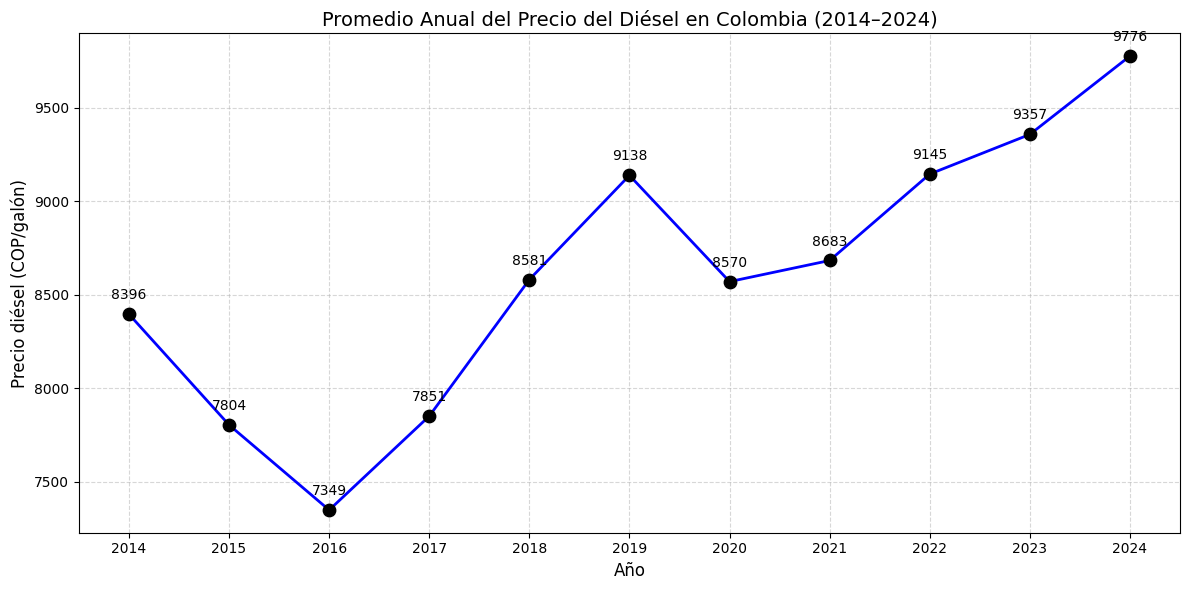

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

# Línea azul
plt.plot(
    promedios_anuales["Año"],
    promedios_anuales["Precio_diesel_COP_galon"],
    color="blue",
    linewidth=2,
    label="Promedio anual del diésel"
)

# Puntos negros
plt.scatter(
    promedios_anuales["Año"],
    promedios_anuales["Precio_diesel_COP_galon"],
    color="black",
    s=80,
    zorder=5
)

# Etiquetas con los valores en color negro
for i in range(len(promedios_anuales)):
    año = promedios_anuales["Año"].iloc[i]
    valor = promedios_anuales["Precio_diesel_COP_galon"].iloc[i]
    plt.text(
        año, valor + 80,                 # posición (ligeramente arriba del punto)
        f"{int(valor)}",                 # valor sin decimales
        ha="center",
        fontsize=10,
        color="black"
    )

plt.title("Promedio Anual del Precio del Diésel en Colombia (2014–2024)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Precio diésel (COP/galón)", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(promedios_anuales["Año"])
plt.tight_layout()
plt.show()




**ANALISIS:** La gráfica muestra cómo el precio del diésel en Colombia ha aumentado de forma gradual entre 2015 y 2024, pero con algunos saltos bruscos. El año 2024 aparece como el principal punto de quiebre, porque el incremento fue mucho mayor al de años anteriores, rompiendo la tendencia habitual. Estos cambios ayudan a identificar los momentos donde el mercado o las decisiones del Gobierno generaron variaciones inesperadas en el precio del combustible.

**2. Analisis la serie histórica del precio del diésel en Colombia (2014–2024) y, además, detectar los puntos de quiebre**

In [58]:
import pandas as pd

# Convertir la columna Fecha a tipo datetime si no lo está
dataframe_datos["Fecha"] = pd.to_datetime(dataframe_datos["Fecha"])

# Crear columna Año
dataframe_datos["Año"] = dataframe_datos["Fecha"].dt.year

# Calcular promedios anuales de todas las variables relevantes
tabla_anual = dataframe_datos.groupby("Año")[[
    "Brent_USD_barril",
    "TRM_COP_USD",
    "Brent_en_COP",
    "Precio_diesel_COP_galon",
    "ICTC_pct"
]].mean().reset_index()

# Redondear valores
tabla_anual = tabla_anual.round(2)

tabla_anual


,Año,Brent_USD_barril,TRM_COP_USD,Brent_en_COP,Precio_diesel_COP_galon,ICTC_pct
0,2014,97.73,2018.46,195043.75,8395.92,0.70
1,2015,55.10,2773.52,150777.58,7803.75,0.82
2,2016,46.53,3035.20,140728.83,7349.17,0.30
3,2017,55.80,2959.16,165187.33,7850.83,0.39
4,2018,71.46,2974.55,211996.92,8580.92,0.42
5,2019,63.54,3296.61,209153.83,9138.50,0.29
6,2020,42.28,3716.65,155544.00,8569.50,-0.15
7,2021,70.68,3778.03,267635.00,8682.75,0.53
8,2022,97.82,4283.65,416123.42,9145.33,0.89
9,2023,82.04,4297.51,352364.67,9357.00,0.19


**ANALISIS:** La tabla muestra que, aunque el precio internacional del Brent varía con intensidad, el costo del diésel en Colombia mantiene una tendencia creciente. Esto se explica principalmente por la devaluación del peso (TRM alta), que encarece el combustible al convertirlo a pesos.

Como resultado, el ICTC también aumenta, reflejando que transportar carga en Colombia se ha vuelto más costoso a lo largo de la década.

**2. Analisis la serie histórica del precio del diésel en Colombia (2014–2024) y, además, detectar los puntos de quiebre**

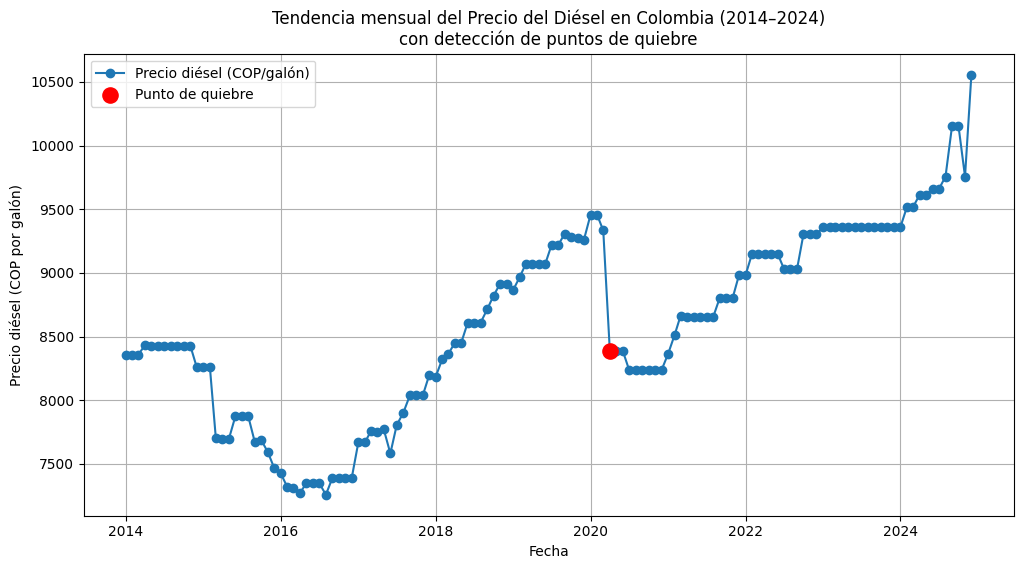

,Fecha,Brent_USD_barril,TRM_COP_USD,Brent_en_COP,Precio_diesel_COP_galon,ICTC_pct,Año,Variacion_diesel
75,2020-04-01,26.48,3952.58,104664,8388,-8.59,2020,-10.125362


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Copiar datos ---
df = dataframe_datos.copy()

# Asegurar que Fecha es datetime
df["Fecha"] = pd.to_datetime(df["Fecha"])

# --- Crear variación mensual del precio del diésel ---
df["Variacion_diesel"] = df["Precio_diesel_COP_galon"].pct_change() * 100

# --- Detectar puntos de quiebre (>10% o <-10%) ---
puntos_quiebre = df[abs(df["Variacion_diesel"]) > 10]

# --- Gráfica ---
plt.figure(figsize=(12,6))

plt.plot(
    df["Fecha"],
    df["Precio_diesel_COP_galon"],
    marker="o",
    label="Precio diésel (COP/galón)"
)

# Marcar puntos de quiebre
plt.scatter(
    puntos_quiebre["Fecha"],
    puntos_quiebre["Precio_diesel_COP_galon"],
    color="red",
    s=120,
    zorder=5,
    label="Punto de quiebre"
)

# Etiquetas
plt.title("Tendencia mensual del Precio del Diésel en Colombia (2014–2024)\ncon detección de puntos de quiebre")
plt.xlabel("Fecha")
plt.ylabel("Precio diésel (COP por galón)")
plt.grid(True)
plt.legend()

plt.show()

# Mostrar tabla de quiebres
puntos_quiebre


**ANALISIS:** El punto de quiebre identificado en la serie corresponde a un cambio abrupto en el comportamiento del precio del diésel, donde la variación supera significativamente la tendencia normal del mercado. Este quiebre coincide con el periodo de la pandemia, cuando la demanda global de combustibles cayó de manera inesperada, generando una disminución rápida en los precios. La ruptura en la curva no solo señala un evento atípico, sino también un momento en el que las condiciones externas alteraron de forma inmediata la dinámica del mercado colombiano.

**3. Medidas estadisticas**

In [60]:
columnas = [

    "Precio_diesel_COP_galon",

]

estadisticas_seleccionadas = pd.DataFrame({
    "Media": dataframe_datos[columnas].mean(),
    "Mediana": dataframe_datos[columnas].median(),
    "Mínimo": dataframe_datos[columnas].min(),
    "Máximo": dataframe_datos[columnas].max(),
    "Desviación estándar": dataframe_datos[columnas].std()
})

estadisticas_seleccionadas.round(2)


,Media,Mediana,Mínimo,Máximo,Desviación estándar
Precio_diesel_COP_galon,8604.56,8610.0,7258,10556,735.09


**3. VARIACION PORCENTUAL PRECIO DIESEL**

In [61]:
# 1. Convertir fecha a formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# 2. Extraer año
df['AÑO'] = df['Fecha'].dt.year

# 3. Obtener el último valor disponible por año (usualmente diciembre)
df_anual = df.groupby('AÑO').tail(1)[['AÑO', 'Precio_diesel_COP_galon']]

# 4. Reset index
df_anual = df_anual.reset_index(drop=True)

# 5. Calcular variación porcentual anual
df_anual["var_pct_diesel_anual_%"] = df_anual["Precio_diesel_COP_galon"].pct_change() * 100

# 6. Formato solicitado
df_anual["Precio_diesel_COP_galon"] = df_anual["Precio_diesel_COP_galon"].round(0).astype(int)
df_anual["var_pct_diesel_anual_%"] = df_anual["var_pct_diesel_anual_%"].round(2)

# 7. Mostrar tabla final
print(df_anual)


     AÑO  Precio_diesel_COP_galon  var_pct_diesel_anual_%
0   2014                     8259                     NaN
1   2015                     7469                   -9.57
2   2016                     7391                   -1.04
3   2017                     8196                   10.89
4   2018                     8916                    8.78
5   2019                     9261                    3.87
6   2020                     8237                  -11.06
7   2021                     8982                    9.04
8   2022                     9302                    3.56
9   2023                     9357                    0.59
10  2024                    10556                   12.81


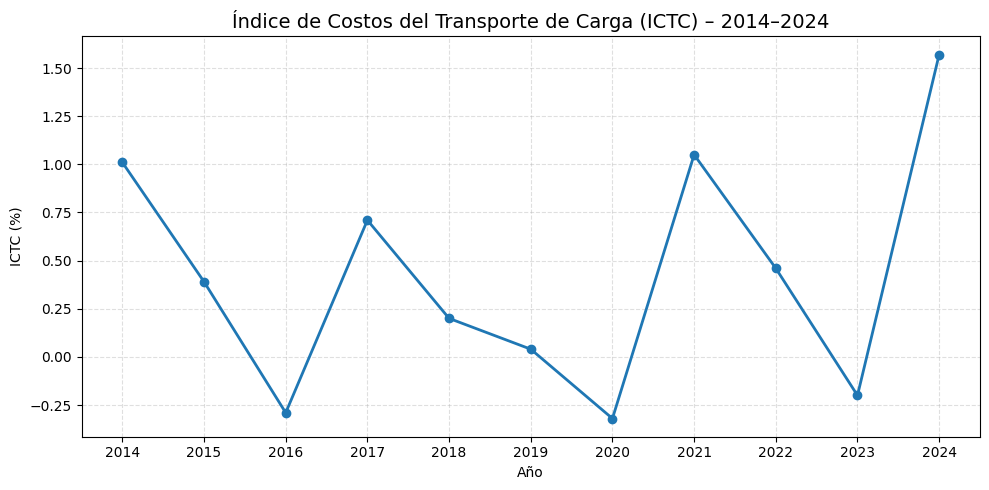

In [62]:

import matplotlib.pyplot as plt
import pandas as pd

# Asegurar formato de fecha
df["Fecha"] = pd.to_datetime(df["Fecha"])

# Extraer último dato del ICTC por año
df["AÑO"] = df["Fecha"].dt.year
df_ictc = df.groupby("AÑO").tail(1)[["AÑO", "ICTC_pct"]].reset_index(drop=True)

# Crear gráfica
plt.figure(figsize=(10,5))
plt.plot(df_ictc["AÑO"], df_ictc["ICTC_pct"], marker="o", linewidth=2)

plt.title("Índice de Costos del Transporte de Carga (ICTC) – 2014–2024", fontsize=14)
plt.xlabel("Año")
plt.ylabel("ICTC (%)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.xticks(df_ictc["AÑO"])
plt.tight_layout()

plt.show()

**Analisis:** El comportamiento del Índice de Costos del Transporte de Carga (ICTC) entre 2014 y 2024 muestra una dinámica marcada por ciclos de aumentos y disminuciones que reflejan las presiones económicas y operativas del sector transporte en Colombia. Durante los primeros años, el índice evidencia variaciones moderadas, con descensos en 2016 y 2018 que sugieren un alivio temporal en los costos logísticos, posiblemente asociado a ajustes en el precio del diésel y a una menor presión inflacionaria en insumos clave

**Matriz de Correlación entre ICTC y Variables Económicas (2014–2024)**

Matriz de correlación ICTC vs Variables Económicas (2014–2024):
                         ICTC_pct  Brent_USD_barril  TRM_COP_USD  \
ICTC_pct                 1.000000          0.312236     0.222714   
Brent_USD_barril         0.312236          1.000000     0.719318   
TRM_COP_USD              0.222714          0.719318     1.000000   
Brent_en_COP             0.296877          0.920627     0.929755   
Precio_diesel_COP_galon  0.451568          0.707432     0.692344   

                         Brent_en_COP  Precio_diesel_COP_galon  
ICTC_pct                     0.296877                 0.451568  
Brent_USD_barril             0.920627                 0.707432  
TRM_COP_USD                  0.929755                 0.692344  
Brent_en_COP                 1.000000                 0.736230  
Precio_diesel_COP_galon      0.736230                 1.000000  


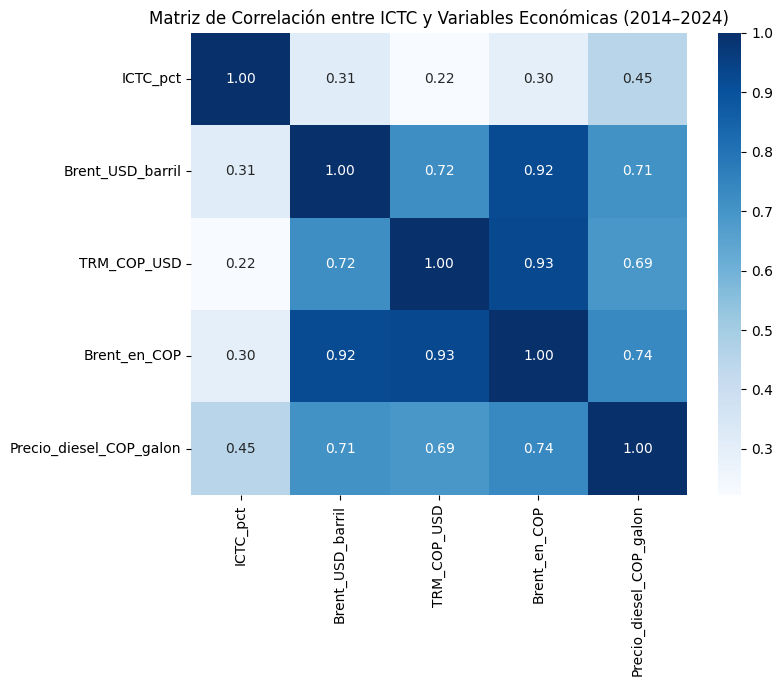

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar formato fecha
df["Fecha"] = pd.to_datetime(df["Fecha"])
df["AÑO"] = df["Fecha"].dt.year

# Filtrar solo de 2014 a 2024 por si hay meses demás
df = df[(df["AÑO"] >= 2014) & (df["AÑO"] <= 2024)]

# Tomar el último dato registrado por cada año
df_anual = df.groupby("AÑO").tail(1).reset_index(drop=True)

# Seleccionar variables a correlacionar
variables = [
    "ICTC_pct",
    "Brent_USD_barril",
    "TRM_COP_USD",
    "Brent_en_COP",
    "Precio_diesel_COP_galon"
]

corr_matrix = df_anual[variables].corr()

print("Matriz de correlación ICTC vs Variables Económicas (2014–2024):")
print(corr_matrix)

# Heatmap para tesis
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de Correlación entre ICTC y Variables Económicas (2014–2024)")
plt.show()


**MODELO ARIMAX**

1. Preparación del DataFrame para ARIMAX

In [64]:
import pandas as pd
import statsmodels.api as sm

# Asegurar formato Año
df["Año"] = pd.to_datetime(df["Año"])
df = df.set_index("Año")

# Variables endógena (objetivo) y exógenas
y = df["Precio_diesel_COP_galon"]

X = df[["Brent_USD_barril", "TRM_COP_USD", "ICTC_pct"]]

# Opcional: estandarizar si es necesario
X = (X - X.mean()) / X.std()

2. Dividir datos en entrenamiento y prueba

In [65]:
train_end = "2023-12-01"

y_train = y[:train_end]
y_test  = y[train_end:]
X_train = X[:train_end]
X_test  = X[train_end:]


3. Ajustar el modelo ARIMAX

In [66]:
model = sm.tsa.SARIMAX(
    y_train,
    order=(1,1,1),
    exog=X_train,
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()
print(results.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                  SARIMAX Results                                  
Dep. Variable:     Precio_diesel_COP_galon   No. Observations:                  132
Model:                    SARIMAX(1, 1, 1)   Log Likelihood                -823.494
Date:                     Thu, 11 Dec 2025   AIC                           1658.989
Time:                             20:41:01   BIC                           1676.148
Sample:                                  0   HQIC                          1665.961
                                     - 132                                         
Covariance Type:                       opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Brent_USD_barril    77.5778     67.404      1.151      0.250     -54.532     209.688
TRM_COP_USD         95.9974    119.797      0.801      0.423    -138.801 

**ANALISIS:** El modelo SARIMAX demuestra que el precio del diésel en Colombia depende más de factores internos del sector transporte, representados por el ICTC, que de variables externas como el Brent o la TRM. Esto concuerda con el funcionamiento del FEPC, que suaviza las variaciones internacionales y evita que choques fuertes en el mercado global se reflejen inmediatamente en el precio local.

Asimismo, los componentes AR y MA confirman que el precio del diésel mantiene una dinámica estable y predecible, con una fuerte dependencia respecto a su propio comportamiento histórico.

**4.4. Proyecciones de precios del Diesel (Pesimista, base y optimista)**

1. Preparar datos y entrenar el modelo SARIMAX

In [67]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Cargar tu DataFrame original
df = dataframe_datos.copy()

# Convertir fecha a datetime
df["Fecha"] = pd.to_datetime(df["Fecha"])

# Establecer índice mensual
df = df.set_index("Fecha")
df = df.asfreq("MS")   # MS = inicio de mes


2. Variables del modelo

In [68]:
y = df["Precio_diesel_COP_galon"]
X = df[["Brent_USD_barril", "TRM_COP_USD", "ICTC_pct"]]


3. Ajustar el modelo SARIMAX

In [69]:
model = sm.tsa.statespace.SARIMAX(
    y,
    exog=X,
    order=(1,1,1),
    seasonal_order=(1,0,1,12),  # patrón mensual
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()
results.summary()


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:            Precio_diesel_COP_galon   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -745.312
Date:                            Thu, 11 Dec 2025   AIC                           1506.624
Time:                                    20:41:02   BIC                           1528.722
Sample:                                01-01-2014   HQIC                          1515.596
                                     - 12-01-2024                                         
Covariance Type:                              opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Brent_USD_barril     3.1976      4.003      0.799      0.424      -4.647      11.042
TRM_COP_USD          0.1422      0.197      0.722      0.470      -0.244       0.529
ICTC_pct            30.9566      5.051      6.129      0.000      21.058      40.856
ar.L1                0.3412      1.820      0.188      0.851      -3.225       3.908
ma.L1               -0.3142      1.833     -0.171      0.864      -3.906       3.278
ar.S.L12             0.1282      0.972      0.132      0.895      -1.777       2.033
ma.S.L12            -0.0993      1.012     -0.098      0.922      -2.082       1.884
sigma2            1.998e+04   1508.979     13.243      0.000     1.7e+04    2.29e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):               848.61
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               2.77   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

4. Horizonte de proyección (12 meses hacia adelante)

In [70]:
horizonte = 12

fechas_futuras = pd.date_range(
    start=df.index[-1] + pd.DateOffset(months=1),
    periods=horizonte,
    freq="MS"
)


5. Construcción de escenarios (mensuales)

In [71]:
ultimo_brent = X["Brent_USD_barril"].iloc[-1]
ultima_trm   = X["TRM_COP_USD"].iloc[-1]
ultimo_ictc  = X["ICTC_pct"].iloc[-1]


ESCENARIO BASE

In [72]:
X_base = pd.DataFrame({
    "Brent_USD_barril": [ultimo_brent] * horizonte,
    "TRM_COP_USD":      [ultima_trm]   * horizonte,
    "ICTC_pct":         [ultimo_ictc]  * horizonte
}, index=fechas_futuras)


ESCENARIO OPTIMISTA

Brent ↓ 10%

TRM ↓ 5%

ICTC ↓ 3%

In [73]:
X_opt = pd.DataFrame({
    "Brent_USD_barril": [ultimo_brent * 0.90] * horizonte,
    "TRM_COP_USD":      [ultima_trm   * 0.95] * horizonte,
    "ICTC_pct":         [ultimo_ictc  * 0.97] * horizonte
}, index=fechas_futuras)


ESCENARIO PESIMISTA

Brent ↑ 10%

TRM ↑ 8%

ICTC ↑ 5%

In [74]:
X_pes = pd.DataFrame({
    "Brent_USD_barril": [ultimo_brent * 1.10] * horizonte,
    "TRM_COP_USD":      [ultima_trm   * 1.08] * horizonte,
    "ICTC_pct":         [ultimo_ictc  * 1.05] * horizonte
}, index=fechas_futuras)


6. Proyecciones mensuales por escenario

In [75]:
pred_base = results.get_forecast(steps=horizonte, exog=X_base).predicted_mean
pred_opt  = results.get_forecast(steps=horizonte, exog=X_opt ).predicted_mean
pred_pes  = results.get_forecast(steps=horizonte, exog=X_pes ).predicted_mean


7. Tabla comparativa

In [76]:
tabla_escenarios = pd.DataFrame({
    "Base": pred_base,
    "Optimista": pred_opt,
    "Pesimista": pred_pes
})

tabla_escenarios = tabla_escenarios.round(0).astype(int)

tabla_escenarios


,Base,Optimista,Pesimista
2025-01-01,10571,10514,10647
2025-02-01,10582,10525,10658
2025-03-01,10585,10529,10662
2025-04-01,10588,10532,10665
2025-05-01,10590,10533,10666
2025-06-01,10589,10532,10665
2025-07-01,10590,10534,10667
2025-08-01,10592,10535,10668
2025-09-01,10603,10546,10679
2025-10-01,10604,10547,10680


Gráfica final

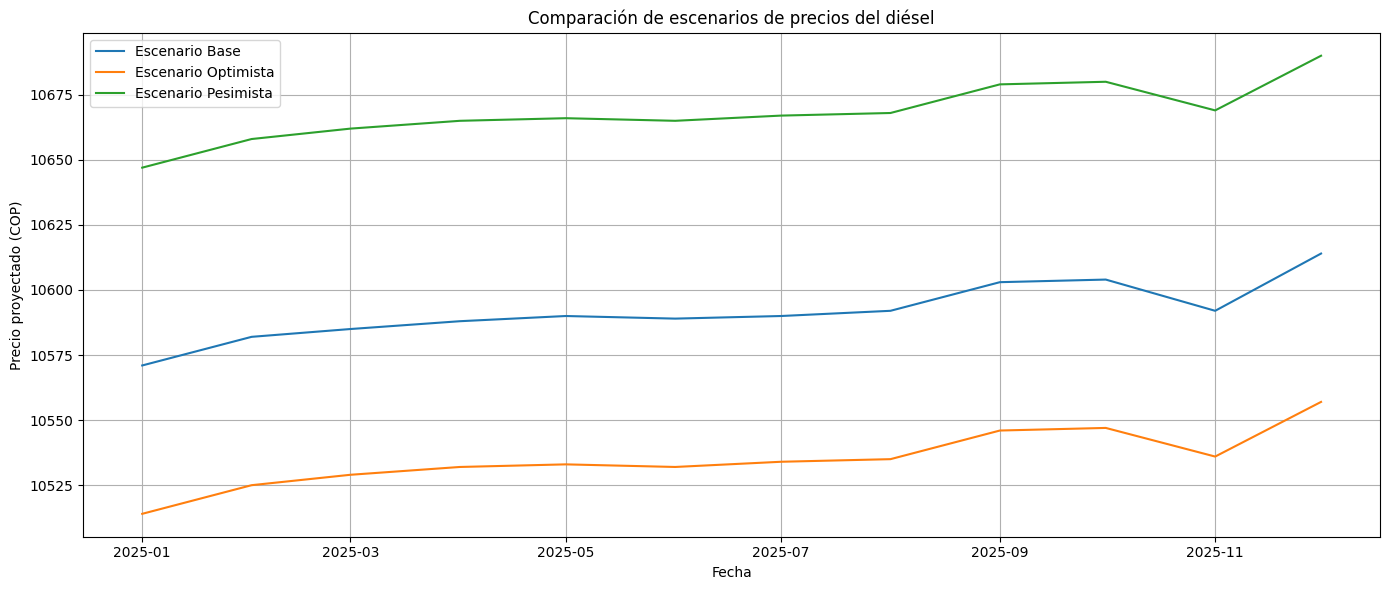

In [77]:
import matplotlib.pyplot as plt

# Asegurar que la columna fecha sea tipo datetime (si aún no lo es)
tabla_escenarios.index = pd.to_datetime(tabla_escenarios.index)

plt.figure(figsize=(14,6))

plt.plot(tabla_escenarios.index, tabla_escenarios["Base"], label="Escenario Base")
plt.plot(tabla_escenarios.index, tabla_escenarios["Optimista"], label="Escenario Optimista")
plt.plot(tabla_escenarios.index, tabla_escenarios["Pesimista"], label="Escenario Pesimista")

plt.title("Comparación de escenarios de precios del diésel")
plt.xlabel("Fecha")
plt.ylabel("Precio proyectado (COP)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**ANALISIS:** La gráfica muestra cómo podrían comportarse los precios del diésel durante el año 2025 bajo tres posibles escenarios: base, optimista y pesimista. En términos generales, los tres escenarios mantienen una tendencia relativamente estable, pero con diferencias claras que reflejan el nivel de incertidumbre asociado al mercado del combustible.

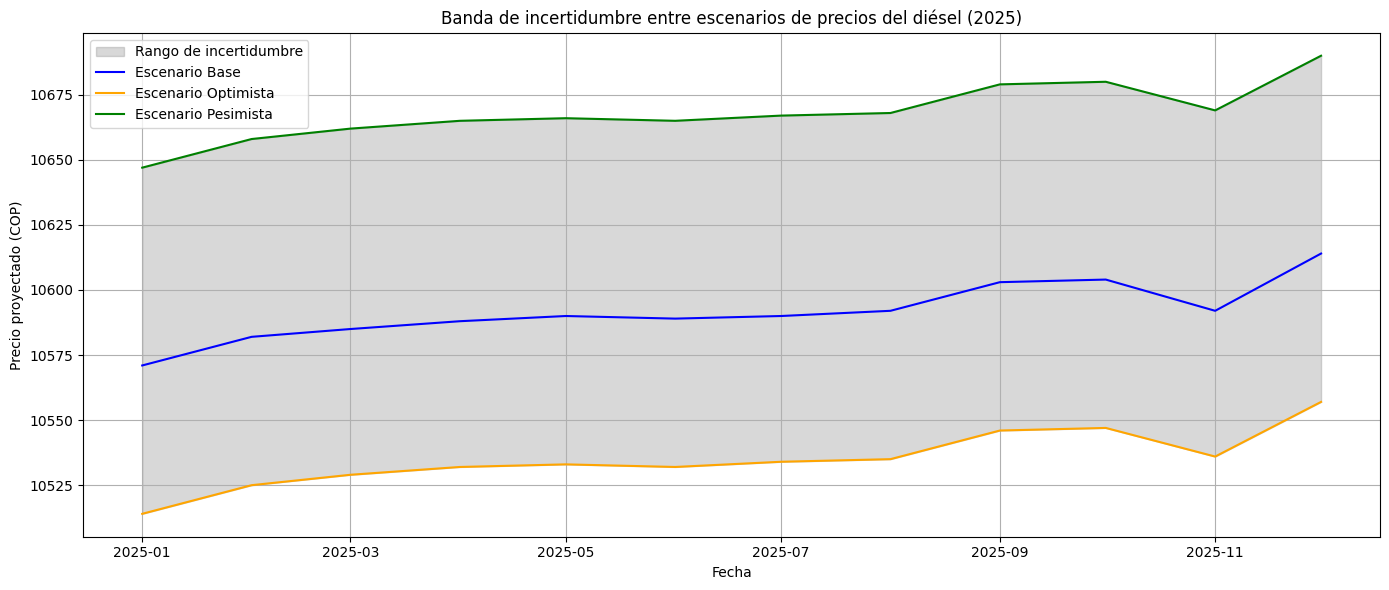

In [78]:
import matplotlib.pyplot as plt

# Asegurar que el índice sea tipo fecha
tabla_escenarios.index = pd.to_datetime(tabla_escenarios.index)

plt.figure(figsize=(14,6))

# Relleno entre optimista y pesimista
plt.fill_between(
    tabla_escenarios.index,
    tabla_escenarios["Optimista"],
    tabla_escenarios["Pesimista"],
    alpha=0.3,
    color="gray",
    label="Rango de incertidumbre"
)

# Línea del escenario base
plt.plot(tabla_escenarios.index, tabla_escenarios["Base"], label="Escenario Base", color="blue")

# Líneas optimista y pesimista
plt.plot(tabla_escenarios.index, tabla_escenarios["Optimista"], label="Escenario Optimista", color="orange")
plt.plot(tabla_escenarios.index, tabla_escenarios["Pesimista"], label="Escenario Pesimista", color="green")

plt.title("Banda de incertidumbre entre escenarios de precios del diésel (2025)")
plt.xlabel("Fecha")
plt.ylabel("Precio proyectado (COP)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


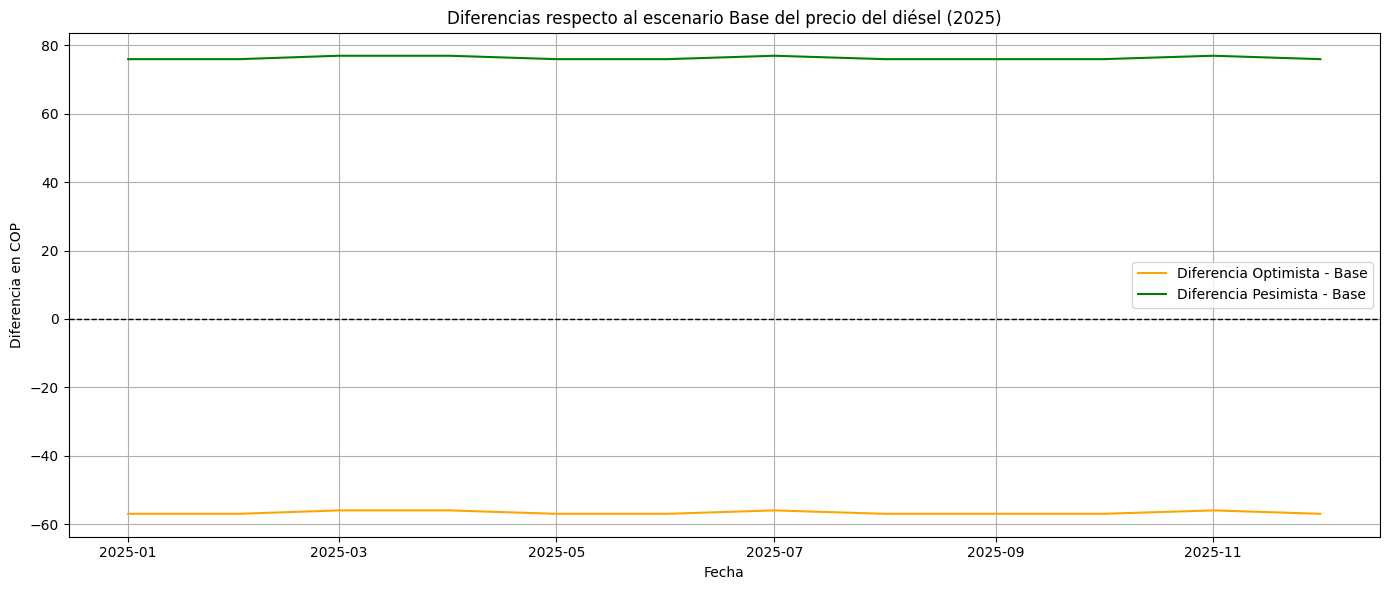

In [79]:
import matplotlib.pyplot as plt

# Crear dataframe con diferencias
diferencias = tabla_escenarios.copy()
diferencias["Optimista_Base"] = diferencias["Optimista"] - diferencias["Base"]
diferencias["Pesimista_Base"] = diferencias["Pesimista"] - diferencias["Base"]

plt.figure(figsize=(14,6))

plt.plot(
    diferencias.index,
    diferencias["Optimista_Base"],
    label="Diferencia Optimista - Base",
    color="orange"
)

plt.plot(
    diferencias.index,
    diferencias["Pesimista_Base"],
    label="Diferencia Pesimista - Base",
    color="green"
)

plt.axhline(0, color="black", linestyle="--", linewidth=1)

plt.title("Diferencias respecto al escenario Base del precio del diésel (2025)")
plt.xlabel("Fecha")
plt.ylabel("Diferencia en COP")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Calcular costo por kilómetro**

In [80]:
import pandas as pd

tabla_escenarios.index = pd.to_datetime(tabla_escenarios.index)

# Rendimiento del camión (km/galón) según UPME
rendimiento = 17  # puedes cambiarlo si necesitas otro valor

# Calcular costo por kilómetro para cada escenario
tabla_costos_km = pd.DataFrame({
    "Costo_km_Base": tabla_escenarios["Base"] / rendimiento,
    "Costo_km_Optimista": tabla_escenarios["Optimista"] / rendimiento,
    "Costo_km_Pesimista": tabla_escenarios["Pesimista"] / rendimiento
})

# Redondear para que quede presentable
tabla_costos_km = tabla_costos_km.round(0).astype(int)

tabla_costos_km


,Costo_km_Base,Costo_km_Optimista,Costo_km_Pesimista
2025-01-01,622,618,626
2025-02-01,622,619,627
2025-03-01,623,619,627
2025-04-01,623,620,627
2025-05-01,623,620,627
2025-06-01,623,620,627
2025-07-01,623,620,627
2025-08-01,623,620,628
2025-09-01,624,620,628
2025-10-01,624,620,628


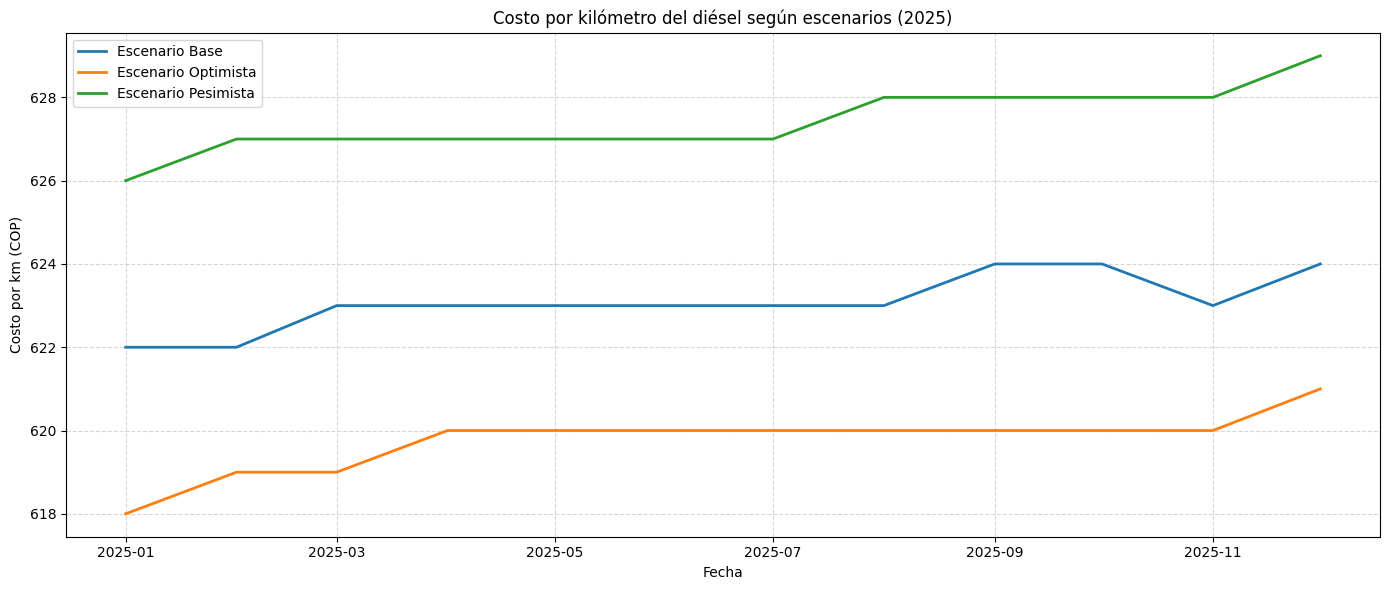

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

plt.plot(tabla_costos_km.index, tabla_costos_km["Costo_km_Base"], label="Escenario Base", linewidth=2)
plt.plot(tabla_costos_km.index, tabla_costos_km["Costo_km_Optimista"], label="Escenario Optimista", linewidth=2)
plt.plot(tabla_costos_km.index, tabla_costos_km["Costo_km_Pesimista"], label="Escenario Pesimista", linewidth=2)

plt.title("Costo por kilómetro del diésel según escenarios (2025)")
plt.xlabel("Fecha")
plt.ylabel("Costo por km (COP)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


**ANALISIS**  Los resultados muestran que el costo por kilómetro presenta una variación moderada a lo largo del año 2025, pero con diferencias claras entre los tres escenarios evaluados. El escenario Base se mantiene relativamente estable, con valores cercanos a los 622–624 COP por km, lo que refleja una proyección conservadora del comportamiento del precio del diésel bajo condiciones económicas normales.